In [2]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Create a larger mock dataset with 10,000 rows
data = {
    "Date": pd.date_range(start="2023-01-01", periods=10000, freq="D"),
    "Food_Category": np.random.choice(["Dairy", "Meat", "Vegetables", "Seafood", "Grains"], 10000),
    "Region": np.random.choice(["North", "South", "East", "West"], 10000),
    "Illness_Count": np.random.randint(1, 100, 10000),  # Number of illnesses, adjusted range for more variation
}

# Create a DataFrame
df = pd.DataFrame(data)

# Show the first few rows of the dataset
print(df.head())



        Date Food_Category Region  Illness_Count
0 2023-01-01       Seafood  South             79
1 2023-01-02        Grains  South             53
2 2023-01-03    Vegetables   East             16
3 2023-01-04        Grains   West             96
4 2023-01-05        Grains  North             37


In [4]:
df.info

<bound method DataFrame.info of            Date Food_Category Region  Illness_Count
0    2023-01-01       Seafood  South             79
1    2023-01-02        Grains  South             53
2    2023-01-03    Vegetables   East             16
3    2023-01-04        Grains   West             96
4    2023-01-05        Grains  North             37
...         ...           ...    ...            ...
9995 2050-05-14          Meat  North              4
9996 2050-05-15    Vegetables  South             96
9997 2050-05-16          Meat   East             29
9998 2050-05-17       Seafood   West             46
9999 2050-05-18    Vegetables  South             75

[10000 rows x 4 columns]>

In [5]:
# Check for missing data
print(df.isnull().sum())


Date             0
Food_Category    0
Region           0
Illness_Count    0
dtype: int64


In [6]:
food_illness = df.groupby("Food_Category")["Illness_Count"].sum().reset_index()
print(food_illness)


  Food_Category  Illness_Count
0         Dairy         102430
1        Grains         101857
2          Meat          99452
3       Seafood          99727
4    Vegetables          97145


In [7]:
region_illness = df.groupby("Region")["Illness_Count"].sum().reset_index()
print(region_illness)


  Region  Illness_Count
0   East         125029
1  North         122905
2  South         122642
3   West         130035


C:\Users\91945\AppData\Local\Temp\ipykernel_19248\3690907648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Food_Category", y="Illness_Count", data=food_illness, palette="coolwarm")


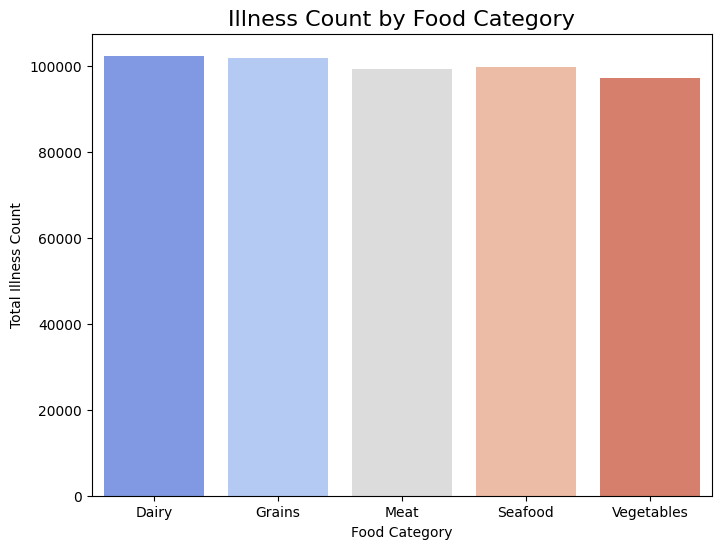

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for illnesses by food category
plt.figure(figsize=(8, 6))
sns.barplot(x="Food_Category", y="Illness_Count", data=food_illness, palette="coolwarm")
plt.title("Illness Count by Food Category", fontsize=16)
plt.xlabel("Food Category")
plt.ylabel("Total Illness Count")
plt.show()


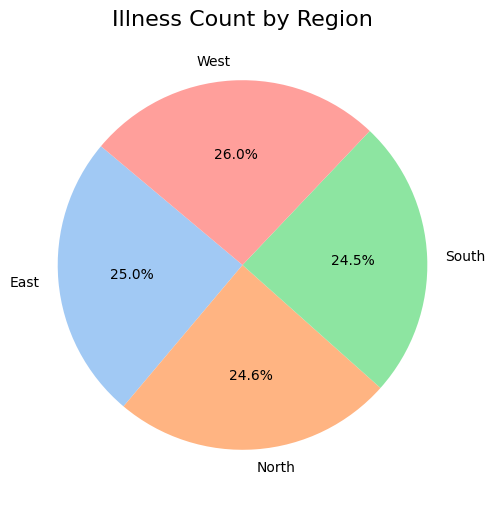

In [9]:
# Pie chart for illnesses by region
plt.figure(figsize=(6, 6))
plt.pie(region_illness["Illness_Count"], labels=region_illness["Region"], autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Illness Count by Region", fontsize=16)
plt.show()


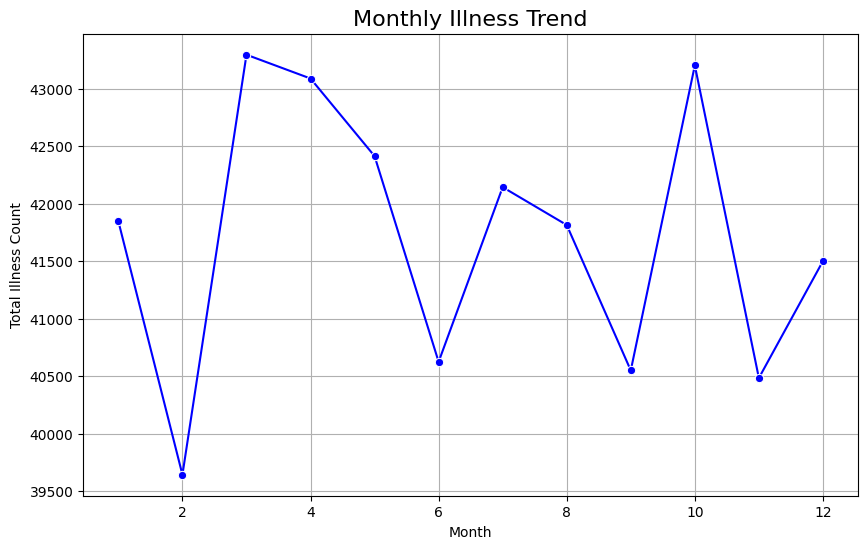

In [10]:
# Extract month from date for trend analysis
df["Month"] = df["Date"].dt.month
monthly_trend = df.groupby("Month")["Illness_Count"].sum().reset_index()

# Line plot for monthly trend
plt.figure(figsize=(10, 6))
sns.lineplot(x="Month", y="Illness_Count", data=monthly_trend, marker="o", color="blue")
plt.title("Monthly Illness Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Illness Count")
plt.grid()
plt.show()


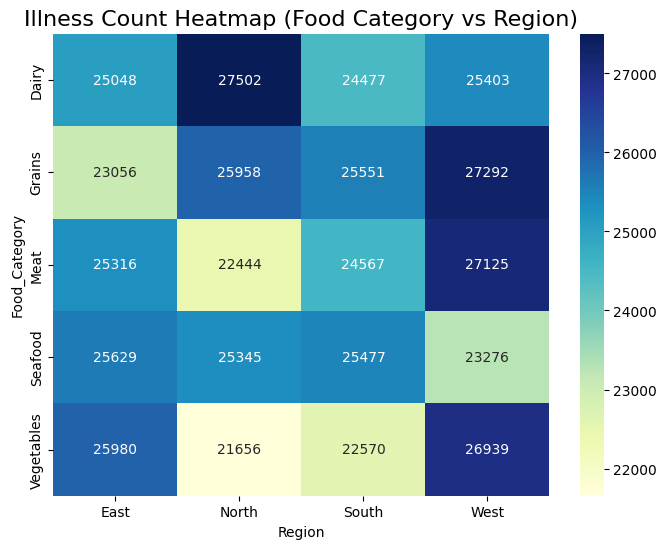

In [11]:
# Pivot data for heatmap
heatmap_data = df.pivot_table(values="Illness_Count", index="Food_Category", columns="Region", aggfunc="sum")

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Illness Count Heatmap (Food Category vs Region)", fontsize=16)
plt.show()


In [12]:
# Find category with highest average illness count
highest_risk = df.groupby("Food_Category")["Illness_Count"].mean().idxmax()
print(f"The highest risk food category is: {highest_risk}")


The highest risk food category is: Seafood


In [13]:
df.to_csv("foodborne_illness_data.csv", index=False)


C:\Users\91945\AppData\Local\Temp\ipykernel_19248\2553271788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Food_Category", y="Illness_Count", data=food_illness, palette="coolwarm")


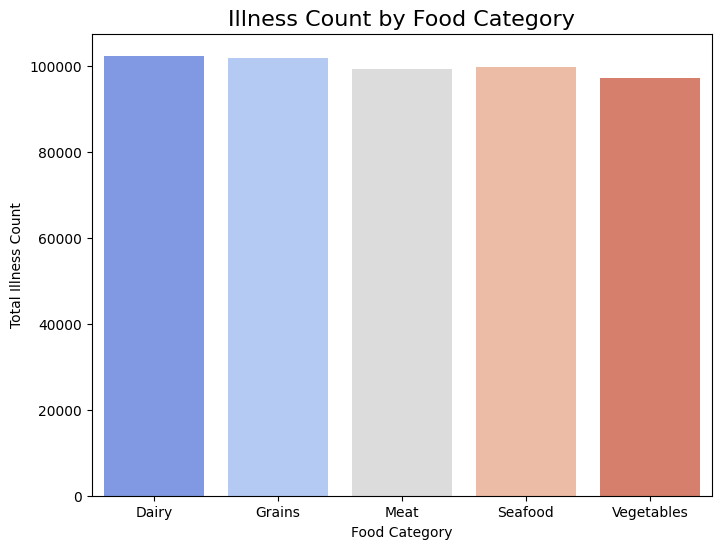

In [14]:
# Save bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Food_Category", y="Illness_Count", data=food_illness, palette="coolwarm")
plt.title("Illness Count by Food Category", fontsize=16)
plt.xlabel("Food Category")
plt.ylabel("Total Illness Count")
plt.savefig("illness_by_food_category.png")
